# Polynomial Regression

Sebelumnya kita telah memanfaatkan linear regression untuk memodelkan relasi antara 2 variabel.
Kita menggunakan asumsi bahwa relasi antar dua variabel (`x` dan `target`) bersifat linear.
Namun bagaimana jika kita mempunyai data lain, dan relasi antar variabelnya non linear?

Sebagai contoh, data di bawah ini.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# script untuk generate data train dummy
x = np.sort(np.linspace(0, np.pi * 2, 20))
target = np.random.normal(np.sin(x), 0.25)

# script untuk generate data testing dummy
x_test = np.linspace(0, 2 * np.pi, 100)
target_test = np.sin(x_test)

**Note: Pembahasan tentang pembagian data training dan testing akan ada pada materi selanjutnya**

Kalo kita visualisasikan kedua dataset tersebut.

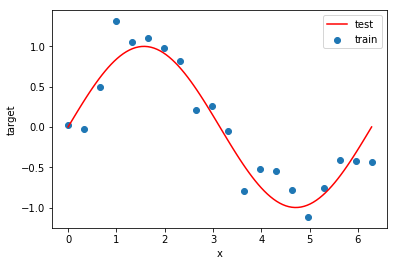

In [4]:
plt.scatter(x, target, label="train")
plt.plot(x_test, target_test, color='red', label="test")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("target")
plt.show()

## Underfitting

Kita bisa menggunakan model linear yang sama seperti pada bagian sebelumnya.
Jika ini kita lakukan, maka kita akan mendapati model kita tidak perform baik terhadap data training dan data test.
Fenomena ini disebut dengan istilah underfitting.
Dimana model kita gagal memberikan hasil yang optimal dalam memodelkan relasi antar 2 variabel tersebut.

Ilustrasi dari fenomena ini bisa dilihat pada grafik di bawah.

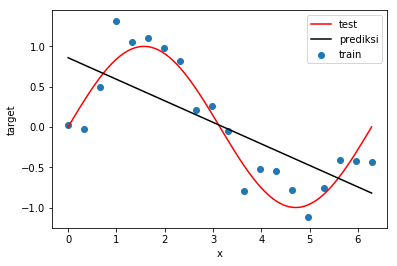

In [5]:
from sklearn.linear_model import LinearRegression


# instansiasi model linear regression
linreg = LinearRegression()

# training pada data
# kemudian prediction pada pada testing
linreg.fit(x.reshape(-1, 1), target)
y = linreg.predict(x_test.reshape(-1, 1))


# visualisasikan hasil prediksi model
plt.scatter(x, target, label="train")
plt.plot(x_test, target_test, color='red', label="test")
plt.plot(x_test, y, color='black', label="prediksi")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("target")
plt.show()

## Linear Model with Polynomial Features

Salah satu cara menangani problem underfitting adalah dengan menambahkan features sehingga model machine learning kita memiliki lebih banyak informasi dalam mengambil keputusan.
Ini bisa kita lakukan dengan cara:

- memilih lebih banyak features dari data (jika memungkinkan), atau
- menambahkan sekumpulan features baru dengan mentransformasi features yang sebelumnya telah ada (features engineering).

Kita akan menggunakan cara ke-2.
Yaitu dengan menambahkan polynomial features.
Variabel independen (x) bisa kita transformasikan kedalam bentuk polinomial dan menggunakannya dalam linear model yang telah kita buat sebelumnya.

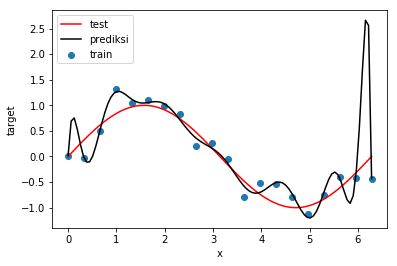

In [7]:
from sklearn.preprocessing import PolynomialFeatures


# instansiasi model polynomial features
transformer = PolynomialFeatures(degree=15)

# transform variabel x dan x_test
x_polynomial = transformer.fit_transform(x.reshape(-1, 1))
x_test_polynomial = transformer.fit_transform(x_test.reshape(-1, 1))


# ulangi langkah yang sama dengan sebelumnya
# fit dan predict
linreg.fit(x_polynomial, target)
y = linreg.predict(x_test_polynomial)

# visualisasikan hasil prediksi model
plt.scatter(x, target, label="train")
plt.plot(x_test, target_test, color='red', label="test")
plt.plot(x_test, y, color='black', label="prediksi")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("target")
plt.show()

## Overfitting

Kalau kita lihat hasil prediksi (garis hitam), model kita mampu memprediksi seluruh data training (titik biru) dengan benar.
Namun gagal mendekati target pada data test (garis merah).
Fenomena ini disebut dengan overfitting.
Dimana model kita terlalu kompleks, sehingga kehilangan kemampuan generalisasi.
Atau sederhananya, model kita memiliki performa yang sangat bagus ketika training (evaluasi terhadap data training), tetapi memiliki performa yang sangat buruk ketika validasi / testing (evaluasi terhadap data test).

Beberapa pendekatan yang mungkin dilakukan untuk menyelesaikan masalah overfitting adalah diantaranya:

- menambah jumlah data sampel (jika memungkinkan), atau
- mengurangi kompleksitas model, contoh: menambahkan regularization pada model, mengurangi jumlah features

Dalam kasus ini, kita bisa mengurangi kompleksitas model dengan mengurangi degree polynomial features.

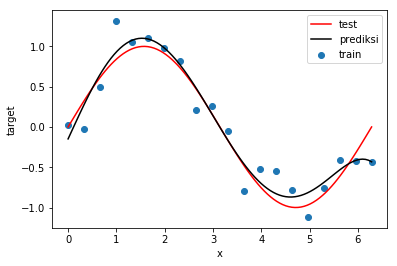

In [8]:
# kurangi degree polynomial dari sebelumnya 15 ke 5
transformer = PolynomialFeatures(degree=5)

# transform variabel x dan x_test
x_polynomial = transformer.fit_transform(x.reshape(-1, 1))
x_test_polynomial = transformer.fit_transform(x_test.reshape(-1, 1))


# ulangi langkah yang sama dengan sebelumnya
# fit dan predict
linreg.fit(x_polynomial, target)
y = linreg.predict(x_test_polynomial)

# visualisasikan hasil prediksi model
plt.scatter(x, target, label="train")
plt.plot(x_test, target_test, color='red', label="test")
plt.plot(x_test, y, color='black', label="prediksi")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("target")
plt.show()


Bisa kita lihat bahwa sekarang garis hitam sudah (hasil prediksi data testing) sudah berhimpit dengan garis merah (target testing).
Artinya kita telah berhasil menghindari kasus overfitting dan mendapatkan model yang lebih baik dari sebelumnya dengan parameter polynomial degree = 5.


Perlu dicatat bahwa fenomena underfitting dan overfitting ini bisa terjadi pada banyak kasus, tidak hanya terbatas pada kasus regression saja.
Dalam kasus yang lain overfitting bisa muncul dengan perilaku yang berbeda dan sulit diidentifikasi.
Namun cara - cara menghindari overfitting di atas masih relevan untuk diterapkan di banyak kasus lain seperti klasifikasi.

## Quiz

Untuk mencari nilai degree yang optimal, cobalah dengan nilai degree lain, misal 3, 7, 9.
Kemudian evaluasi masing - masing model tersebut dengan sum squared error.
Berapakah nilai degree yang optimum yang anda dapatkan ?